In [21]:
#######################################
#'''数据爬取：新冠疫情一年的新增，总确诊，死亡，治愈，死亡率，治愈率的数据'''
#######################################
import urllib.request
import re
#公共路径名操作模块
import os
import random
import pandas as pd

def use_agent():
    iplist = ['115.221.242.112:9999','1.199.30.171:9999']

    proxy_support = urllib.request.ProxyHandler({'https':random.choice(iplist)})
    opener = urllib.request.build_opener(proxy_support)
    print('use_agent')

def open_url(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18362')
    page = urllib.request.urlopen(req)
    response = page.read()
    html = str(response)
    return html

def find_datalist(html,i):
    #print(html)
    p = '"%s":(.*?),'%tabel_list[i]
    #不能找到单个，可以在找到一类中定位
    name_list[i] = re.findall(p,html)
    return name_list[i]
            
if __name__ =='__main__':
    url = 'https://api.inews.qq.com/newsqa/v1/automation/modules/list?modules=FAutoGlobalStatis,FAutoContinentStatis,FAutoGlobalDailyList,FAutoCountryConfirmAdd'
    tabel_list = ['y','date','confirm','dead','heal','newAddConfirm','deadRate','healRate']
    name_list = ['y_list','date_list','confirm_list','dead_list','heal_list','newAddConfirm_list',
                'deadRate_list','healRate_list']
    html = open_url(url)
    for i in range(len(tabel_list)):
        name_list[i] = find_datalist(html,i)
        #print(len(name_list[i]))
    #print(name_list)
    dataframe = pd.DataFrame({'y':name_list[0][:359],'date':name_list[1][47:406],'confirm':name_list[2][:359],
                              'dead':name_list[3][:359],'heal':name_list[4][:359],'newAddConfirm':name_list[5][:359],
                              'deadRate':name_list[6][:359],'healRate':name_list[7][:359]})
    print(dataframe)
    dataframe.to_csv(r'alltime_world.csv',sep=',')
    print('数据已保存，位置为程序同一文件夹下')

          y     date   confirm     dead      heal newAddConfirm deadRate  \
0    "2020"  "01.28"        57        0         3             0   "0.00"   
1    "2020"  "01.29"        74        0         3            13   "0.00"   
2    "2020"  "01.30"        98        0         6            22   "0.00"   
3    "2020"  "01.31"       124        0        11            20   "0.00"   
4    "2020"  "02.01"       139        0        11            13   "0.00"   
..      ...      ...       ...      ...       ...           ...      ...   
354  "2021"  "01.16"  94395002  2015269  65939884        701504   "2.13"   
355  "2021"  "01.17"  95011364  2027595  66382574        627505   "2.13"   
356  "2021"  "01.18"  95535397  2036327  66761192        530245   "2.13"   
357  "2021"  "01.19"  96082128  2047655  67249070        523443   "2.13"   
358  "2021"  "01.20"  96710953  2064212  67873106        633786   "2.13"   

      healRate  
0     "5.26"}}  
1     "4.05"}}  
2     "6.12"}}  
3     "8.87"}}  
4 

In [29]:
#######################################
#'''数据处理：修改格式错误的数据'''
#######################################
import pandas as pd

#从文件中读取数据，得到DataFrame格式数据
source_data = pd.read_csv(r'alltime_world.csv',
                          skiprows = 0,encoding = 'gbk',header = 0)
#print(source_data)
#在列表中写入需要进行数据处理的列名
deal_title_list = ['y','date','deadRate','healRate'] 
#修改格式错误的数据
for title in deal_title_list:    
    for i in range(len(source_data[title])):
        source_data[title][i] = source_data[title][i].split('"')[1]
print(source_data) 
source_data.to_csv(r'alltime_world1.csv',sep=',')
print('修改后的数据已保存，位置为程序同一文件夹下')

     Unnamed: 0     y   date   confirm     dead      heal  newAddConfirm  \
0             0  2020  01.28        57        0         3              0   
1             1  2020  01.29        74        0         3             13   
2             2  2020  01.30        98        0         6             22   
3             3  2020  01.31       124        0        11             20   
4             4  2020  02.01       139        0        11             13   
..          ...   ...    ...       ...      ...       ...            ...   
354         354  2021  01.16  94395002  2015269  65939884         701504   
355         355  2021  01.17  95011364  2027595  66382574         627505   
356         356  2021  01.18  95535397  2036327  66761192         530245   
357         357  2021  01.19  96082128  2047655  67249070         523443   
358         358  2021  01.20  96710953  2064212  67873106         633786   

    deadRate healRate  
0       0.00     5.26  
1       0.00     4.05  
2       0.00   

<ipython-input-29-7945e34f5438>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_data[title][i] = source_data[title][i].split('"')[1]


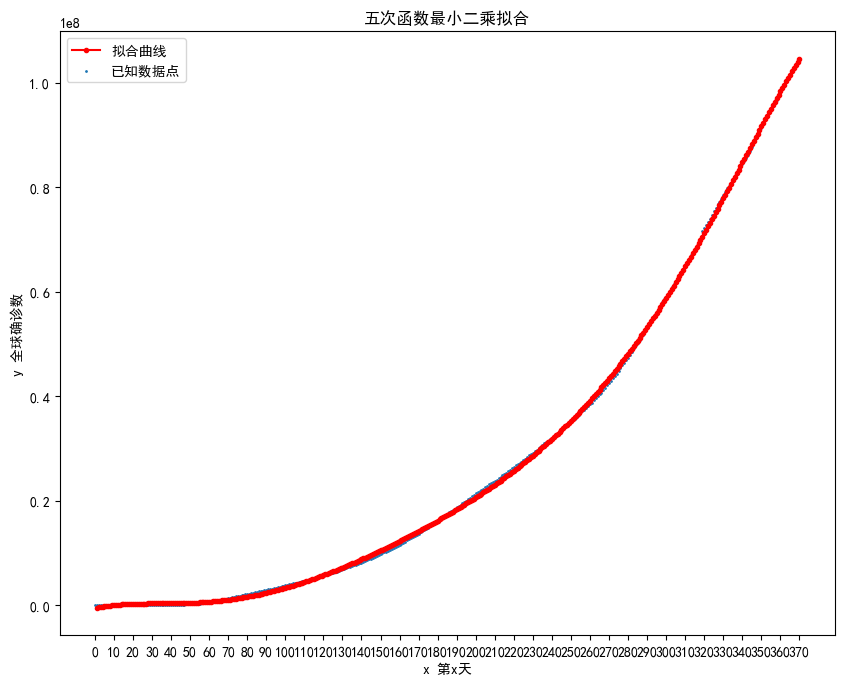

在2021年2月1日全球确诊人数为：104614051


In [27]:
#######################################
#'''数据可视化，建立数学模型进行发展预测'''
#现有数据为2021年1月23日确诊98659742，日新增770421，因此推测，对2021年2月1日的新冠疫情确诊人数预测可靠
#######################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     #用来正常显示负号

#######################读取数据，转换成 #########################

source = pd.read_csv(r'alltime_world1.csv',skiprows = 0,
                    encoding = 'gbk',header = 0)
#print(source)
x=np.array(source['Unnamed: 0'])
y=np.array(source['confirm'])

#######################调用函数进行最小二乘拟合###################

z1 = np.polyfit(x, y,6) # 用5次多项式拟合，可改变多项式阶数；
p1 = np.poly1d(z1)       #得到多项式，按照阶数从高到低排列
#print(p1)                #显示多项式
x1=np.arange(1,371,1)
yvals=p1(x1)              # 可直接使用yvals=np.polyval(z1,x)

########################绘制图形################################

plt.figure(figsize = (10,8),dpi = 100)
_xtick_lables = [i for i in range(0,371)][::10]
plt.xticks(_xtick_lables,rotation = 0)

plt.scatter(x,y,s=1,label=u"已知数据点")
plt.plot(x1,yvals,color='r',linestyle='-',marker='.',label=u"拟合曲线")
plt.legend(loc='upper left')   # 指定legend在图中的位置，类似象限的位置
plt.xlabel('x 第x天')
plt.ylabel('y 全球确诊数')
plt.title('五次函数最小二乘拟合')
plt.show()
print('在2021年2月1日全球确诊人数为：%d'%int(yvals[-1]))

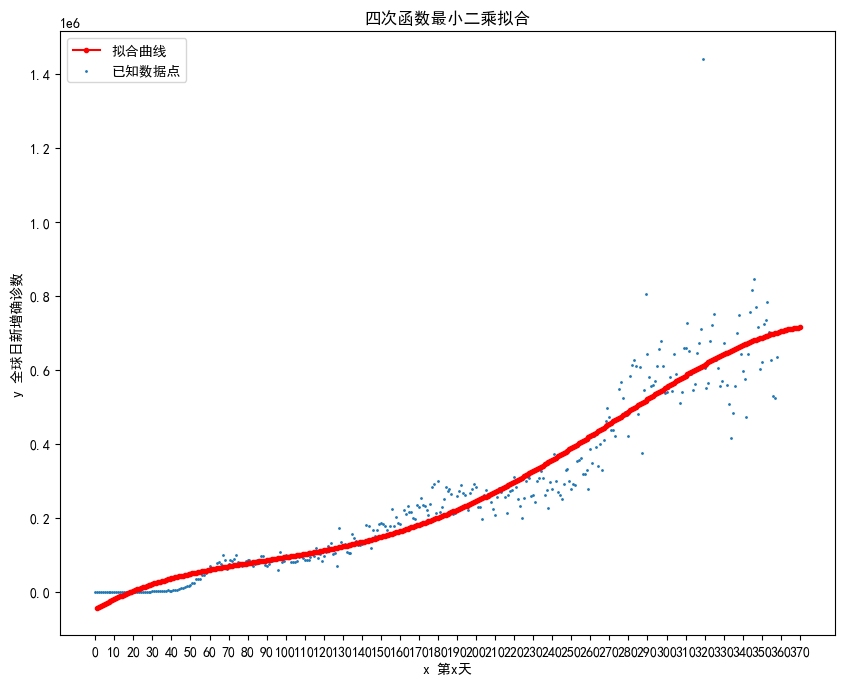

在2021年2月1日全球日新增确诊人数为：715442


In [40]:
#######################################
#'''数据可视化，建立数学模型进行发展预测'''
#由拟合图像可知，全球确诊新增病例还会不断高速增加，但增长加速度已经趋于变缓
#######################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     #用来正常显示负号

#######################读取数据，转换成 #########################

source = pd.read_csv(r'alltime_world1.csv',skiprows = 0,
                    encoding = 'gbk',header = 0)
#print(source)
x=np.array(source['Unnamed: 0'])
y=np.array(source['newAddConfirm'])

#######################调用函数进行最小二乘拟合###################

z1 = np.polyfit(x, y,4) # 用5次多项式拟合，可改变多项式阶数；
p1 = np.poly1d(z1)       #得到多项式，按照阶数从高到低排列
#print(p1)                #显示多项式
x1=np.arange(1,371,1)
yvals=p1(x1)              # 可直接使用yvals=np.polyval(z1,x)

########################绘制图形################################

plt.figure(figsize = (10,8),dpi = 100)
_xtick_lables = [i for i in range(0,371)][::10]
plt.xticks(_xtick_lables,rotation = 0)

plt.scatter(x,y,s=1,label=u"已知数据点")
plt.plot(x1,yvals,color='r',linestyle='-',marker='.',label=u"拟合曲线")
plt.legend(loc='upper left')   # 指定legend在图中的位置，类似象限的位置
plt.xlabel('x 第x天')
plt.ylabel('y 全球日新增确诊数')
plt.title('四次函数最小二乘拟合')
plt.show()
print('在2021年2月1日全球日新增确诊人数为：%d'%int(yvals[-1]))

[array([-990437.32689349]), array([33226.69926893]), array([-45.01218059]), array([2.01057528])]


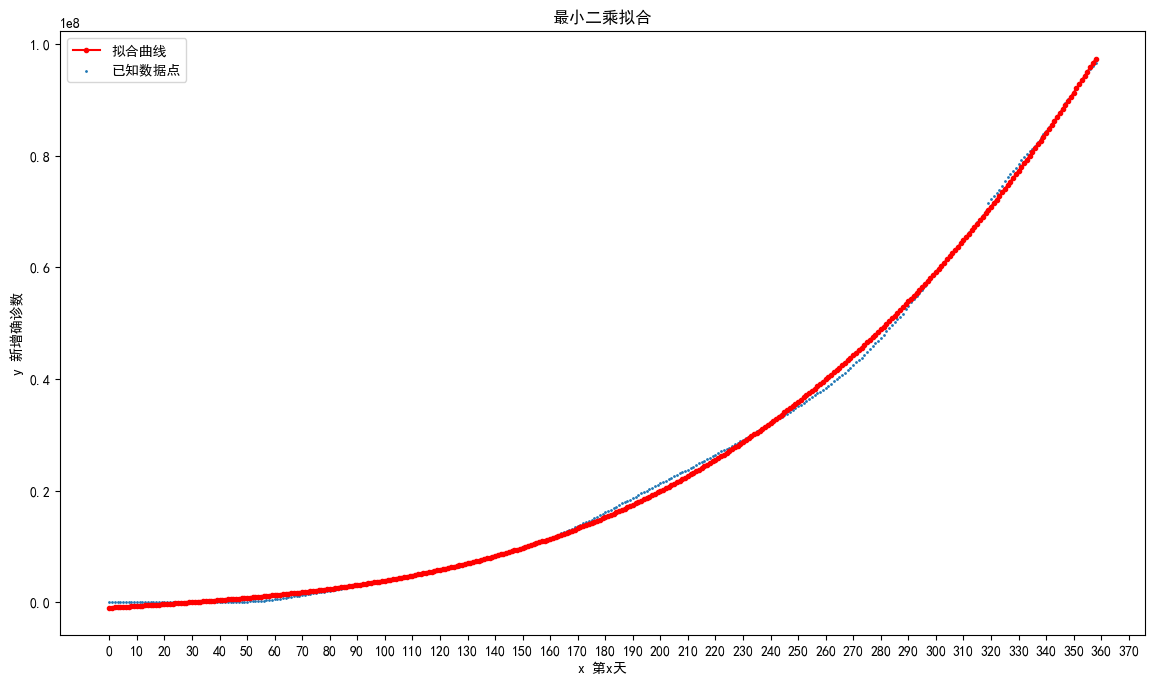

In [33]:
#######################################
#利用矩阵法方程编写最小二乘算法，进行日新增确诊数据拟合

#######################################
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     #用来正常显示负号

source = pd.read_csv(r'alltime_world1.csv',skiprows = 0,
                    encoding = 'gbk',header = 0)
#print(source)
x=np.array(source['Unnamed: 0'])
y=np.array(source['confirm'])

##################################
### 核心程序
#使用函数y=ax^3+bx^2+cx+d对离散点进行拟合，最高次方需要便于修改，所以不能全部列举，需要使用循环
#A矩阵
m=[]
for i in range(4):#这里选的最高次为x^4的多项式
    a=x**(i)
    m.append(a)
A=np.array(m).T
b=y.reshape(y.shape[0],1)

##################################

def projection(A,b):
    AA = A.T.dot(A)#A乘以A转置
    w=np.linalg.inv(AA).dot(A.T).dot(b)
    print(list(w))
    return A.dot(w)

yw = projection(A,b)
yw.shape = (yw.shape[0],)

plt.figure(figsize = (14,8),dpi = 100)
_xtick_lables = [i for i in range(0,371)][::10]
plt.xticks(_xtick_lables,rotation = 0)
 
plt.scatter(x,y,s=1,label=u"已知数据点")
plt.plot(x,yw,color='r',linestyle='-',marker='.',label=u"拟合曲线")
plt.legend(loc='upper left')
plt.xlabel('x 第x天')
plt.ylabel('y 新增确诊数')
plt.title('最小二乘拟合')
#plt.tick_params(labelsize=13) #刻度字体大小13
plt.show()